In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

# Data Understanding

## Memuat Data

In [53]:
# Membaca data dari file CSV dan menyimpannya ke dalam DataFrame
file_csv = "survey_purwadhika.csv"
df = pd.read_csv(file_csv)
df

,ID,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender
0,1,26,Jawa Tengah,S1,Instagram,2,DM,1200000,Pria
1,2,23,Yogyakarta,S1,Teman,3,WD,2000000,Pria
2,3,30,Jawa Tengah,S1,Lainnya,2,DM,1600000,Pria
3,4,27,Bali,S1,Teman,3,DM,1100000,Pria
4,5,24,Jawa Tengah,S1,Lainnya,1,WD,1200000,Pria
5,6,21,Jawa Barat,S1,LinkedIn,2,WD,1500000,Pria
6,7,28,Yogyakarta,S1,Instagram,1,WD,1400000,Pria
7,8,22,Jawa Barat,SMA,Instagram,2,DM,1600000,Pria
8,9,25,Yogyakarta,S1,Teman,3,WD,1600000,Pria
9,10,29,Jawa Tengah,S1,Instagram,2,DM,1600000,Pria


## Menghapus Kolom ID

In [54]:
# Kolom ID tidak diperlukan untuk analisis, jadi dihapus jika ada.
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])
df.head()

,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender
0,26,Jawa Tengah,S1,Instagram,2,DM,1200000,Pria
1,23,Yogyakarta,S1,Teman,3,WD,2000000,Pria
2,30,Jawa Tengah,S1,Lainnya,2,DM,1600000,Pria
3,27,Bali,S1,Teman,3,DM,1100000,Pria
4,24,Jawa Tengah,S1,Lainnya,1,WD,1200000,Pria


## Membersihkan Data

In [55]:
# Melakukan pembersihan data dengan menghapus baris duplikat dan baris yang memiliki nilai kosong.
# Juga, mengonversi kolom "Umur" dan "Pengeluaran_Bulanan" ke tipe data numerik.
df = df.drop_duplicates()   # Menghapus baris duplikat
df = df.dropna()    # Menghapus baris dengan nilai kosong
df["Umur"] = pd.to_numeric(df["Umur"], errors='coerce')  # Mengonversi kolom "Umur" ke numerik
df["Tingkat_Kemampuan"] = pd.to_numeric(df["Tingkat_Kemampuan"], errors='coerce')  # Mengonversi kolom "Tingkat_Kemampuan" ke numerik

## Membuat Kelompok Usia

In [56]:
# Membuat fungsi untuk mengelompokkan usia ke dalam kategori dan menambahkan kolom "Kelompok_Umur" ke DataFrame.
def kategori_umur(umur):
    if umur < 15:
        return "<15"
    elif 15 <= umur <= 20:
        return "15-20"
    elif 21 <= umur <= 25:
        return "21-25"
    elif 26 <= umur <= 30:
        return "26-30"
    elif 31 <= umur <= 35:
        return "31-35"
    elif 36 <= umur <= 40:
        return "36-40"
    elif 41 <= umur <= 45:
        return "41-45"
    elif 46 <= umur <= 50:
        return "46-50"
    elif 51 <= umur <= 55:
        return "51-55"
    else:
        return "55+"

df["Kelompok_Umur"] = df["Umur"].apply(kategori_umur)
df[["Umur", "Kelompok_Umur"]].head().sort_values("Umur")
# Keterangan: Setiap nilai di kolom "Umur" diubah menjadi kategori berdasarkan fungsi di atas.

,Umur,Kelompok_Umur
1,23,21-25
4,24,21-25
0,26,26-30
3,27,26-30
2,30,26-30


## Statistik Deskriptif

In [57]:
# Menampilkan ringkasan statistik untuk data numerik dan juga data kategorikal.
print("\nStatistik Deskriptif Data Numerik:")
print(round(df.describe(),2))

print("\nStatistik Deskriptif Data Kategorikal:")
df.describe(include=['object'])


Statistik Deskriptif Data Numerik:
        Umur  Tingkat_Kemampuan  Pengeluaran_Bulanan
count  50.00              50.00                50.00
mean   27.12               2.02           1414000.00
std     4.38               0.82            286434.81
min    20.00               1.00            800000.00
25%    24.00               1.00           1225000.00
50%    27.00               2.00           1400000.00
75%    30.00               3.00           1600000.00
max    39.00               3.00           2000000.00

Statistik Deskriptif Data Kategorikal:


,Asal_Daerah,Pendidikan,Informasi_Purwadhika,kelas,gender,Kelompok_Umur
count,50,50,50,50,50,50
unique,7,2,5,2,2,5
top,Jawa Tengah,S1,Instagram,DM,Pria,21-25
freq,16,46,19,30,45,19


# Visualisasi

## Visualisasi Bar Plot Tingkat Kemampuan

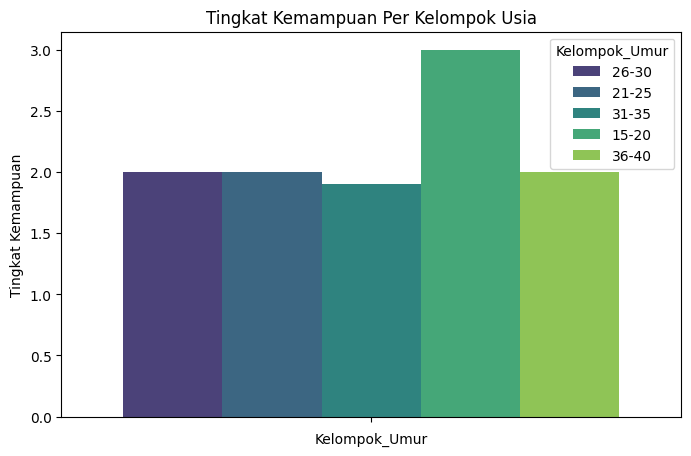

In [58]:
#Membuat bar plot untuk membandingkan tingkat kemampuan antar kelompok usia.
plt.figure(figsize=(8,5))
sns.barplot(data=df, hue="Kelompok_Umur", y="Tingkat_Kemampuan", estimator=np.mean, errorbar=None, palette="viridis")
plt.xticks(rotation=45)
plt.title("Tingkat Kemampuan Per Kelompok Usia")
plt.xlabel("Kelompok_Umur")
plt.ylabel("Tingkat Kemampuan")
plt.show()

## Visualisasi Countplot Distribusi Kelompok Usia dalam Kelas

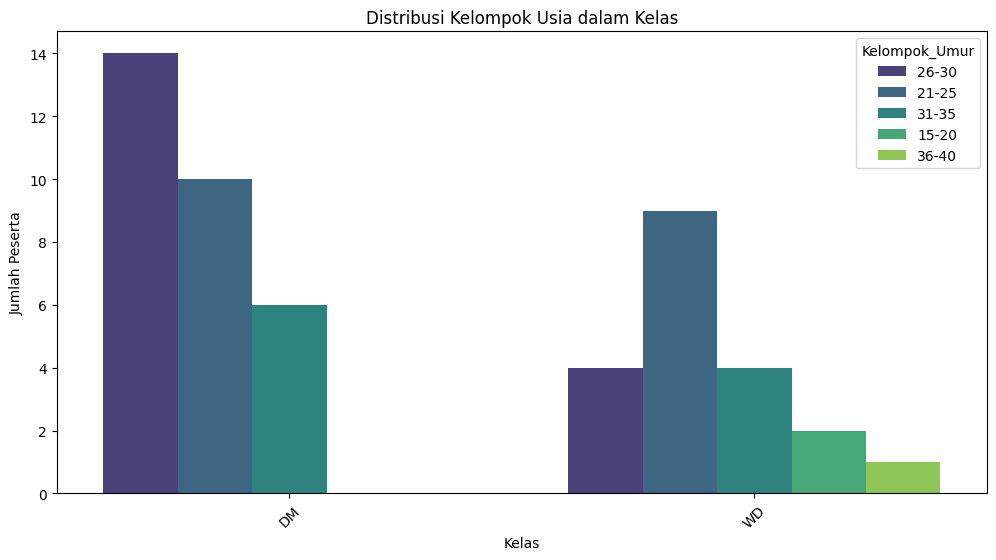

In [59]:
# Menampilkan jumlah siswa di masing-masing kelas dengan perincian berdasarkan kelompok usia.
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="kelas", hue="Kelompok_Umur", palette="viridis")
plt.title("Distribusi Kelompok Usia dalam Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Peserta")
plt.legend(title="Kelompok_Umur")
plt.xticks(rotation=45)
plt.show()

# Uji Normalitas

## Uji Shapiro-Wilk

In [60]:
# Uji ini menentukan apakah data Tingkat Kemampuan berdistribusi normal.
statis, p_value = stats.shapiro(df["Tingkat_Kemampuan"].dropna())
print("\nUji Normalitas (Shapiro-Wilk) untuk Tingkat Kemampuan:")
print(f"Statistik: {statis}, p-value: {p_value}")

if p_value > 0.05:
    print("Hipotesis nol diterima: Data berdistribusi normal.")
else:
    print("Hipotesis nol ditolak: Data tidak berdistribusi normal.")


Uji Normalitas (Shapiro-Wilk) untuk Tingkat Kemampuan:
Statistik: 0.7950453707902179, p-value: 6.754066001941224e-07
Hipotesis nol ditolak: Data tidak berdistribusi normal.


## Uji Kolmogorov-Smirnov

In [61]:
# Uji ini membandingkan distribusi data dengan distribusi normal sebagai uji tambahan.
statis, p_value = stats.kstest(df["Tingkat_Kemampuan"].dropna(), 'norm')
print("\nUji Normalitas (Kolmogorov-Smirnov) untuk Tingkat Kemampuan:")
print(f"Statistik: {statis}, p-value: {p_value}")

if p_value > 0.05:
    print("Hipotesis nol diterima: Data mengikuti distribusi normal.")
else:
    print("Hipotesis nol ditolak: Data tidak mengikuti distribusi normal.")


Uji Normalitas (Kolmogorov-Smirnov) untuk Tingkat Kemampuan:
Statistik: 0.8413447460685429, p-value: 2.934018384393368e-40
Hipotesis nol ditolak: Data tidak mengikuti distribusi normal.


## Uji D'Agostino

In [62]:
# Uji ini menggabungkan skewness dan kurtosis untuk menguji normalitas.
stat_dagostino, p_value_dagostino = stats.normaltest(df["Tingkat_Kemampuan"].dropna())
print("\nUji Normalitas D'Agostino-Pearson untuk Tingkat Kemampuan:")
print(f"Statistik: {stat_dagostino}, p-value: {p_value_dagostino}")

if p_value_dagostino > 0.05:
    print("Hipotesis nol diterima: Data berdistribusi normal.")
else:
    print("Hipotesis nol ditolak: Data tidak berdistribusi normal.")


Uji Normalitas D'Agostino-Pearson untuk Tingkat Kemampuan:
Statistik: 38.89711155265722, p-value: 3.577663954032605e-09
Hipotesis nol ditolak: Data tidak berdistribusi normal.


# Uji Non-Parametrik

## Uji Mann-Whitney U

In [63]:
# Uji non-parametrik untuk membandingkan dua kelompok usia pada tingkat kemampuan.
kelompok1 = df[df["Kelompok_Umur"] == "15-20"]["Tingkat_Kemampuan"]
kelompok2 = df[df["Kelompok_Umur"] == "26-30"]["Tingkat_Kemampuan"]
mann_whitney_stat, mann_whitney_p = stats.mannwhitneyu(kelompok1, kelompok2)
print("\nUji Mann-Whitney U antara Kelompok 15-20 dan 26-30:")
print(f"Statistik: {mann_whitney_stat}, p-value: {mann_whitney_p}")

if mann_whitney_p < 0.05:
    print("Hipotesis nol ditolak: Terdapat perbedaan signifikan antara kedua kelompok.")
else:
    print("Hipotesis nol diterima: Tidak terdapat perbedaan signifikan antara kedua kelompok.")


Uji Mann-Whitney U antara Kelompok 15-20 dan 26-30:
Statistik: 32.0, p-value: 0.06381823586912731
Hipotesis nol diterima: Tidak terdapat perbedaan signifikan antara kedua kelompok.


## Uji Chi-Square

In [64]:
# Keterangan: Uji ini menguji apakah terdapat hubungan antara kategori usia dan pilihan kelas.
contingency_table = pd.crosstab(df["Kelompok_Umur"], df["kelas"])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print("\nUji Chi-Square antara Kelompok Usia dan Kelas:")
print(f"Chi2: {chi2}, p-value: {p}")

if p < 0.05:
    print("Hipotesis nol ditolak: Ada hubungan antara kelompok usia dan pemilihan kelas.")
else:
    print("Hipotesis nol diterima: Tidak ada hubungan antara kelompok usia dan pemilihan kelas.")



Uji Chi-Square antara Kelompok Usia dan Kelas:
Chi2: 7.300194931773879, p-value: 0.120849502791626
Hipotesis nol diterima: Tidak ada hubungan antara kelompok usia dan pemilihan kelas.


## Uji Kruskal-Wallis

In [65]:
# Uji non-parametrik sebagai alternatif jika data tidak normal, membandingkan peringkat antar kelompok.
kruskal_stat, kruskal_p = kruskal(*kelompok_data)
print("\nUji Kruskal-Wallis untuk Tingkat Kemampuan berdasarkan Kelompok Usia:")
print(f"Statistik: {kruskal_stat}, p-value: {kruskal_p}")

if kruskal_p < 0.05:
    print("Hipotesis nol ditolak: Ada perbedaan signifikan dalam pengeluaran bulanan antar kelompok usia.")
else:
    print("Hipotesis nol diterima: Tidak ada perbedaan signifikan dalam pengeluaran bulanan antar kelompok usia.")


Uji Kruskal-Wallis untuk Tingkat Kemampuan berdasarkan Kelompok Usia:
Statistik: 3.1182576618358264, p-value: 0.5382339668333764
Hipotesis nol diterima: Tidak ada perbedaan signifikan dalam pengeluaran bulanan antar kelompok usia.


# Uji Parametrik

## Uji t-Test

In [66]:
# Uji t-Test (Independent t-Test) untuk membandingkan tingkat kemampuan antara dua kelompok usia (15-20 dan 26-30).
t_stat, t_p = stats.ttest_ind(
    df[df["Kelompok_Umur"] == "15-20"]["Tingkat_Kemampuan"],
    df[df["Kelompok_Umur"] == "26-30"]["Tingkat_Kemampuan"],
    equal_var=False  # Gunakan False jika varians kedua kelompok tidak homogen
)
print("\nUji t-Test antara Kelompok 15-20 dan 26-30:")
print(f"Statistik t: {t_stat}, p-value: {t_p}")

if t_p < 0.05:
    print("Hipotesis nol ditolak: Terdapat perbedaan signifikan antara kedua kelompok.")
else:
    print("Hipotesis nol diterima: Tidak terdapat perbedaan signifikan antara kedua kelompok.")


Uji t-Test antara Kelompok 15-20 dan 26-30:
Statistik t: 6.18465843842649, p-value: 9.988446799248281e-06
Hipotesis nol ditolak: Terdapat perbedaan signifikan antara kedua kelompok.


c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## Uji ANOVA

In [67]:
# Menguji apakah terdapat perbedaan Tingkat Kemampuan di antara berbagai kelompok usia.
kelompok_data = [df[df["Kelompok_Umur"] == k]["Tingkat_Kemampuan"] for k in df["Kelompok_Umur"].unique()]
anova_stat, anova_p = f_oneway(*kelompok_data)
print("\nUji One-Way ANOVA untuk Tingkat Kemampuan berdasarkan Kelompok Usia:")
print(f"Statistik: {anova_stat}, p-value: {anova_p}")

if anova_p < 0.05:
    print("Hipotesis nol ditolak: Ada perbedaan signifikan dalam Tingkat Kemampuan antar kelompok usia.")
else:
    print("Hipotesis nol diterima: Tidak ada perbedaan signifikan dalam Tingkat Kemampuan antar kelompok usia.")


Uji One-Way ANOVA untuk Tingkat Kemampuan berdasarkan Kelompok Usia:
Statistik: 0.7572815533980582, p-value: 0.5585595907693648
Hipotesis nol diterima: Tidak ada perbedaan signifikan dalam Tingkat Kemampuan antar kelompok usia.


# Uji Korelasi

## Uji Korelasi Pearson

In [68]:
# Mengukur kekuatan hubungan linier antara usia dan tingkat kemampuan.
pearson_corr, pearson_p = stats.pearsonr(df["Umur"], df["Tingkat_Kemampuan"])
print("\nUji Korelasi Pearson antara Umur dan Tingkat Kemampuan:")
print(f"Korelasi: {pearson_corr}, p-value: {pearson_p}")

if pearson_p < 0.05:
    print("Hipotesis nol ditolak: Ada hubungan signifikan antara umur dan tingkat kemampuan.")
else:
    print("Hipotesis nol diterima: Tidak ada hubungan signifikan antara umur dan tingkat kemampuan.")


Uji Korelasi Pearson antara Umur dan Tingkat Kemampuan:
Korelasi: -0.13704223734680918, p-value: 0.34261407340575173
Hipotesis nol diterima: Tidak ada hubungan signifikan antara umur dan tingkat kemampuan.


## Uji Korelasi Spearman

In [69]:
# Mengukur hubungan monotonic antara usia dan Tingkat Kemampuan (alternatif non-parametrik).
spearman_corr, spearman_p = stats.spearmanr(df["Umur"], df["Tingkat_Kemampuan"])
print("\nUji Korelasi Spearman antara Umur dan Tingkat Kemampuan:")
print(f"Korelasi: {spearman_corr}, p-value: {spearman_p}")

if spearman_p < 0.05:
    print("Hipotesis nol ditolak: Ada hubungan signifikan antara umur dan Tingkat Kemampuan.")
else:
    print("Hipotesis nol diterima: Tidak ada hubungan signifikan antara umur dan Tingkat Kemampuan.")


Uji Korelasi Spearman antara Umur dan Tingkat Kemampuan:
Korelasi: -0.16949734168628117, p-value: 0.23929496672469996
Hipotesis nol diterima: Tidak ada hubungan signifikan antara umur dan Tingkat Kemampuan.


# Uji Perbedaan Proporsi

In [70]:
# Menghitung jumlah siswa yang memilih kelas "Reguler" pada masing-masing kelompok usia.
jumlah_15_20 = df[(df["Kelompok_Umur"] == "15_20") & (df["kelas"] == "Reguler")].shape[0]
total_15_20 = df[df["Kelompok_Umur"] == "15_20"].shape[0]
jumlah_26_30 = df[(df["Kelompok_Umur"] == "26_30") & (df["kelas"] == "Reguler")].shape[0]
total_26_30 = df[df["Kelompok_Umur"] == "26_30"].shape[0]

# Menyusun array jumlah kasus dan total sampel untuk kedua kelompok
jumlah_kasus = np.array([jumlah_15_20, jumlah_26_30])
total_sampel = np.array([total_15_20, total_26_30])

# Melakukan uji z untuk dua proporsi
stat_z, p_z = proportions_ztest(jumlah_kasus, total_sampel)
print("\nUji Perbedaan Proporsi antara Kelompok 15-20 dan 26_30 untuk kelas 'Reguler':")
print(f"Statistik Z: {stat_z:.3f}, p-value: {p_z:.3f}")

if p_z < 0.05:
    print("Hipotesis nol ditolak: Terdapat perbedaan proporsi yang signifikan antara kedua kelompok.")
else:
    print("Hipotesis nol diterima: Tidak terdapat perbedaan proporsi yang signifikan antara kedua kelompok.")


Uji Perbedaan Proporsi antara Kelompok 15-20 dan 26_30 untuk kelas 'Reguler':
Statistik Z: nan, p-value: nan
Hipotesis nol diterima: Tidak terdapat perbedaan proporsi yang signifikan antara kedua kelompok.


c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\proportion.py:1004: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs
c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\proportion.py:1018: RuntimeWarning: invalid value encountered in scalar divide
  p_pooled = np.sum(count) * 1. / np.sum(nobs)
c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\proportion.py:1020: RuntimeWarning: divide by zero encountered in divide
  nobs_fact = np.sum(1. / nobs)
